In [1]:
#FINAL PROJECT: Diabetes Classification Without Using HBA1C or Blood Sugar
#Data source: https://archive.ics.uci.edu/ml/datasets/Early+stage+diabetes+risk+prediction+dataset.#

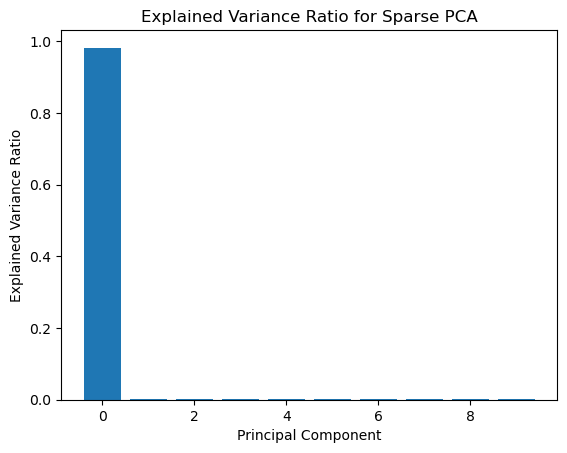

Sparse PCA Statistics:
Explained Variance Ratio:
Principal Component 1: 0.9825
Principal Component 2: 0.0030
Principal Component 3: 0.0025
Principal Component 4: 0.0019
Principal Component 5: 0.0023
Principal Component 6: 0.0017
Principal Component 7: 0.0018
Principal Component 8: 0.0016
Principal Component 9: 0.0012
Principal Component 10: 0.0015

Key Features:
Principal Component 1: Feature 0
Principal Component 2: Feature 2
Principal Component 3: Feature 9
Principal Component 4: Feature 1
Principal Component 5: Feature 8
Principal Component 6: Feature 6
Principal Component 7: Feature 4
Principal Component 8: Feature 5
Principal Component 9: Feature 10
Principal Component 10: Feature 14


In [25]:
#Analyze the dataset after running sparse PCA.  What do we know about the attributes?

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import SparsePCA
from sklearn.model_selection import train_test_split

# Get the current directory
current_dir = os.getcwd()

# Find the .csv file in the current directory
csv_files = [file for file in os.listdir(current_dir) if file.endswith(".csv")]

# Check if the .csv file exists
if "diabetes_data_upload.csv" in csv_files:
    dataset_file = os.path.join(current_dir, "diabetes_data_upload.csv")
else:
    raise FileNotFoundError("diabetes_data_upload.csv file not found in the current directory.")

# Define a data loader function
def load_dataset(file_path):
    # Load the dataset from the CSV file
    df = pd.read_csv(file_path)

    # Perform one-hot encoding for categorical variables
    df_encoded = pd.get_dummies(df, drop_first=True)

    # Extract the feature matrix X
    X = df_encoded.iloc[:, :-1].values

    # Extract the target variable y
    y = df_encoded.iloc[:, -1].values

    return X, y

# Load the dataset using the data loader
X, y = load_dataset(dataset_file)

# Initialize SparsePCA
sparse_pca = SparsePCA(n_components=10, random_state=42)

# Fit and transform the data
X_sparse = sparse_pca.fit_transform(X)

# Calculate the explained variance ratio manually
explained_variance = np.var(X_sparse, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)

# Plot explained variance ratio
plt.bar(range(len(explained_variance_ratio)), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Sparse PCA')
plt.show()

# Identify key features
key_features = np.abs(sparse_pca.components_).argmax(axis=1)

# Print statistics, plots, and key features
print("Sparse PCA Statistics:")
print("Explained Variance Ratio:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Principal Component {i+1}: {ratio:.4f}")

print("\nKey Features:")
for i, feature_idx in enumerate(key_features):
    print(f"Principal Component {i+1}: Feature {feature_idx}")


#####
After PCA, perform Logistic Regression
#####

In [26]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_sparse, y, test_size=0.2, random_state=42)

# Define hyperparameters for Logistic Regression
log_reg_params = {
    'penalty': 'l2',  # Regularization penalty ('l1', 'l2', 'elasticnet', 'none')
    'C': 1.0,  # Inverse of regularization strength
    'solver': 'lbfgs',  # Algorithm to use for optimization ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga')
    'max_iter': 100,  # Maximum number of iterations
    'random_state': 42  # Random seed for reproducibility
}

# Initialize Logistic Regression with hyperparameters
log_reg = LogisticRegression(**log_reg_params)

# Fit the model
log_reg.fit(X_train, y_train)

# Predict the test set results
y_pred = log_reg.predict(X_test)


In [27]:
#Stats and plots for LogReg

from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


              precision    recall  f1-score   support

           0       0.71      0.82      0.76        33
           1       0.91      0.85      0.88        71

    accuracy                           0.84       104
   macro avg       0.81      0.83      0.82       104
weighted avg       0.85      0.84      0.84       104



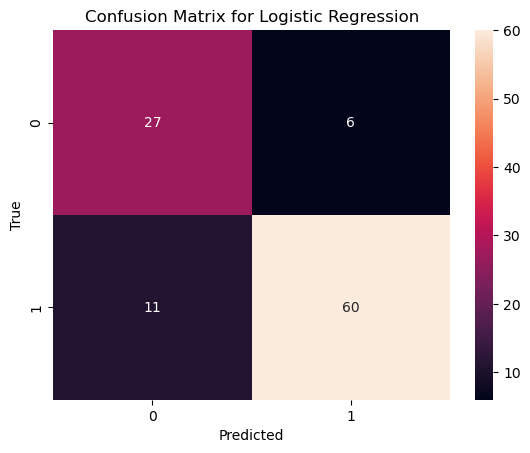

In [28]:

# Fit the model and make predictions
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


######
2. Run Random Forest
#####

In [29]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
random_forest.fit(X_train, y_train)

# Predict the test set results
y_pred = random_forest.predict(X_test)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        33
           1       1.00      0.96      0.98        71

    accuracy                           0.97       104
   macro avg       0.96      0.98      0.97       104
weighted avg       0.97      0.97      0.97       104



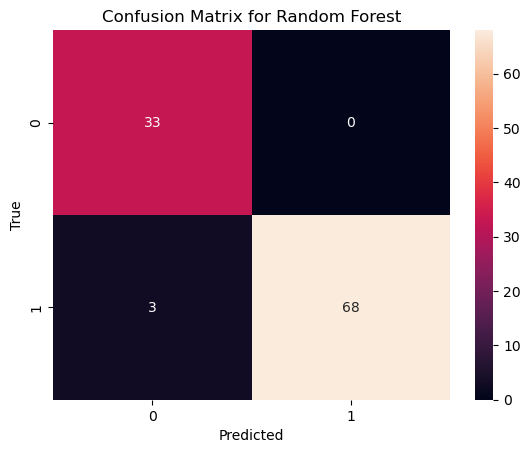

In [30]:
# Fit the model and make predictions
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Think about early stopping

For PPT 
2-3 slides
1. What Why When ?
2. Method, Architecture
3. Results


## Deep and Wide NN

In [71]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Hyperparameters
hyper_params = {
    'batch_size': 16,
    'learning_rate': 0.01,
    'epochs': 100,
    'input_size': X_sparse.shape[1],
    'hidden_size': 1000,
    'output_size': 1,
    'dropout_rate': 0.85,
}

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_sparse, y, test_size=0.2, random_state=42)

# Convert to tensors
X_tensor = torch.tensor(X_train.astype(np.float32))
y_tensor = torch.tensor(y_train.astype(np.float32)).unsqueeze(1)

# Create a Dataset
dataset = TensorDataset(X_tensor, y_tensor)

# Create a DataLoader
data_loader = DataLoader(dataset, batch_size=hyper_params['batch_size'], shuffle=True)

# Use CUDA if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define the Deep and Wide neural network
class DeepWideNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_rate):
        super(DeepWideNN, self).__init__()
        self.deep = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(hidden_size, output_size),
        )

    def forward(self, x):
        out = self.deep(x)
        return out

# Initialize the model, loss function, and optimizer
nn_model = DeepWideNN(
    input_size=hyper_params['input_size'],
    hidden_size=hyper_params['hidden_size'],
    output_size=hyper_params['output_size'],
    dropout_rate=hyper_params['dropout_rate']
).to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(nn_model.parameters(), lr=hyper_params['learning_rate'])

# Training loop
for epoch in range(hyper_params['epochs']):
    for i, (inputs, labels) in enumerate(data_loader):
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = nn_model(inputs)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}/{hyper_params["epochs"]}, Loss: {loss.item()}')

# Display the final loss
print(f"Final Loss: {loss.item()}")

# Save the model
torch.save(nn_model.state_dict(), "nn_model.pth")


Epoch 1/100, Loss: 1.8051395416259766
Epoch 2/100, Loss: 1.543028473854065
Epoch 3/100, Loss: 2.6907734870910645
Epoch 4/100, Loss: 1.5194648504257202
Epoch 5/100, Loss: 1.7931824922561646
Epoch 6/100, Loss: 1.9141720533370972
Epoch 7/100, Loss: 1.6970722675323486
Epoch 8/100, Loss: 1.094388723373413
Epoch 9/100, Loss: 0.6731790900230408
Epoch 10/100, Loss: 0.7253279089927673
Epoch 11/100, Loss: 1.4403998851776123
Epoch 12/100, Loss: 1.1305383443832397
Epoch 13/100, Loss: 0.5602378845214844
Epoch 14/100, Loss: 0.5885822176933289
Epoch 15/100, Loss: 0.6994090676307678
Epoch 16/100, Loss: 1.5500445365905762
Epoch 17/100, Loss: 0.9605274200439453
Epoch 18/100, Loss: 1.1788655519485474
Epoch 19/100, Loss: 0.3303298354148865
Epoch 20/100, Loss: 1.2414838075637817
Epoch 21/100, Loss: 0.8106288909912109
Epoch 22/100, Loss: 1.2772417068481445
Epoch 23/100, Loss: 0.5892582535743713
Epoch 24/100, Loss: 0.29116982221603394
Epoch 25/100, Loss: 1.4428805112838745
Epoch 26/100, Loss: 1.1228239536285

## Tuning our Deep and Wide model

In [70]:
import json
from tqdm import tqdm
# Define a list or range of values for each hyperparameter
batch_sizes = [16,32,64,128, 256, 512]
learning_rates = [0.0001,0.001, 0.01, 0.1]
hidden_sizes = [50, 100, 500, 1000, 1500]
dropout_rates = [0.15, 0.3, 0.5, 0.7, 0.85]

# Placeholder variables for storing the best parameters and the best accuracy
best_params = None
best_accuracy = 0.0

# Use CUDA if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Loop over the hyperparameters
for batch_size in tqdm(batch_sizes):
    for learning_rate in learning_rates:
        for hidden_size in hidden_sizes:
            for dropout_rate in dropout_rates:

                # Create a DataLoader with the current batch_size
                data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

                # Initialize the model, loss function, and optimizer with the current hyperparameters
                nn_model = DeepWideNN(
                    input_size=hyper_params['input_size'],
                    hidden_size=hidden_size,
                    output_size=hyper_params['output_size'],
                    dropout_rate=dropout_rate
                ).to(device)
                criterion = nn.BCEWithLogitsLoss()
                optimizer = optim.SGD(nn_model.parameters(), lr=learning_rate)

                # Training loop
                for epoch in range(hyper_params['epochs']):
                    for i, (inputs, labels) in enumerate(data_loader):
                        inputs, labels = inputs.to(device), labels.to(device)

                        # Forward pass
                        outputs = nn_model(inputs)
                        loss = criterion(outputs, labels)

                        # Backward and optimize
                        optimizer.zero_grad()
                        loss.backward()
                        optimizer.step()

                # Evaluate the model on the test set to get the accuracy
                nn_model.eval()
                with torch.no_grad():
                    X_test_tensor = torch.tensor(X_test.astype(np.float32)).to(device)
                    y_test_tensor = torch.tensor(y_test.astype(np.float32)).unsqueeze(1).to(device)
                    outputs = nn_model(X_test_tensor)
                    predictions = torch.sigmoid(outputs) > 0.5
                    accuracy = (predictions == y_test_tensor).float().mean()

                # If the accuracy is better than the best_accuracy found so far, update the best_params and best_accuracy
                if accuracy > best_accuracy:
                    print(accuracy)
                    best_params = {'batch_size': batch_size, 'learning_rate': learning_rate, 
                                   'hidden_size': hidden_size, 'dropout_rate': dropout_rate}
                    best_accuracy = accuracy

# Print the best hyperparameters and the corresponding accuracy
print(f"Best Params: {best_params}, Best Accuracy: {best_accuracy}")

# Save the best parameters
with open("best_params.json", "w") as f:
    json.dump(best_params, f)


  0%|          | 0/6 [00:00<?, ?it/s]

tensor(0.7115)
tensor(0.7500)
tensor(0.8077)
tensor(0.8462)
tensor(0.8846)
tensor(0.8942)
tensor(0.9038)
tensor(0.9135)
tensor(0.9231)


100%|██████████| 6/6 [08:19<00:00, 83.18s/it] 

Best Params: {'batch_size': 16, 'learning_rate': 0.01, 'hidden_size': 1000, 'dropout_rate': 0.85}, Best Accuracy: 0.9230769276618958


In [72]:
from sklearn.base import BaseEstimator, ClassifierMixin

class PyTorchClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, model, criterion, optimizer, epochs):
        self.model = model
        self.criterion = criterion
        self.optimizer = optimizer
        self.epochs = epochs

    def fit(self, X, y):

        dataset = TensorDataset(X, y)
        data_loader = DataLoader(dataset, batch_size=hyper_params['batch_size'], shuffle=True)

        for epoch in range(self.epochs):
            for i, (inputs, labels) in enumerate(data_loader):
                inputs, labels = inputs.to(device), labels.to(device)

                # Forward pass
                outputs = self.model(inputs)
                loss = self.criterion(outputs, labels)

                # Backward and optimize
                self.optimizer.zero_grad()
                loss.backward()
                self.optimizer.step()

        return self

    def predict_proba(self, X):
        with torch.no_grad():
            outputs = self.model(X)
            probs = torch.sigmoid(outputs)
            return probs.cpu().numpy()

    def predict(self, X):
        probas = self.predict_proba(X)
        return (probas > 0.5).astype(int)

# Wrap the PyTorch model
nn_model_sklearn = PyTorchClassifier(nn_model, criterion, optimizer, epochs=hyper_params['epochs'])

# Now, you can use nn_model_sklearn in your sklearn ensemble models


              precision    recall  f1-score   support

           0       0.78      0.85      0.81        33
           1       0.93      0.89      0.91        71

    accuracy                           0.88       104
   macro avg       0.85      0.87      0.86       104
weighted avg       0.88      0.88      0.88       104



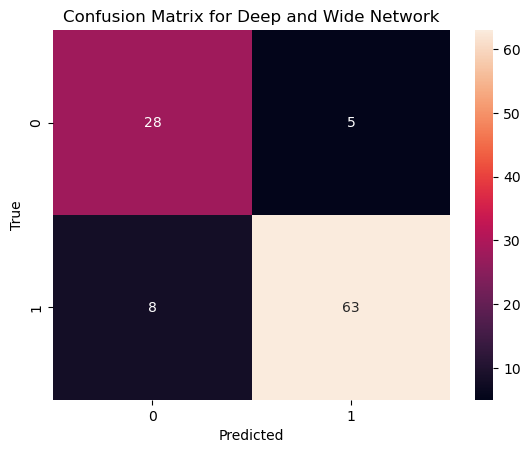

In [73]:
# Fit the model
X_train_tensor = torch.tensor(X_train.astype(np.float32))
y_train_tensor = torch.tensor(y_train.astype(np.float32)).unsqueeze(1)
X_test_tensor = torch.tensor(X_test.astype(np.float32))

nn_model_sklearn.fit(X_train_tensor, y_train_tensor)
y_pred = nn_model_sklearn.predict(X_test_tensor)

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix for Deep and Wide Network')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#####
After running all 3 models, perform ensemble methods of VOTING and STACKING.  Compare results
#####

In [74]:
class PyTorchClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, model, epochs=5):
        self.model = model
        self.epochs = epochs

    def fit(self, X, y):
        X_tensor = torch.tensor(X.astype(np.float32))
        y_tensor = torch.tensor(y.astype(np.float32)).unsqueeze(1)
        self.model.fit(X_tensor, y_tensor)
        return self

    def predict(self, X):
        X_tensor = torch.tensor(X.astype(np.float32))
        y_pred = self.model.predict(X_tensor)
        return y_pred.cpu().numpy()

    def predict_proba(self, X):
        y_pred = self.predict(X)
        return np.column_stack((1 - y_pred, y_pred))

nn_model_sklearn_wrapped = PyTorchClassifierWrapper(nn_model_sklearn)


In [77]:
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score
class PyTorchClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, model, epochs=5):
        self.model = model
        self.epochs = epochs
        self.classes_ = None  # Initialize classes_ attribute

    def fit(self, X, y):
        X_tensor = torch.tensor(X.astype(np.float32))
        y_tensor = torch.tensor(y.astype(np.float32)).unsqueeze(1)
        self.classes_ = np.unique(y)  # update classes_ attribute on fit
        self.model.fit(X_tensor, y_tensor)
        return self

    def predict(self, X):
        X_tensor = torch.tensor(X.astype(np.float32))
        y_pred = self.model.predict(X_tensor)
        return y_pred 

    def predict_proba(self, X):
        y_pred = self.predict(X)
        return np.column_stack((1 - y_pred, y_pred))


nn_model_sklearn_wrapped = PyTorchClassifierWrapper(nn_model_sklearn)

# Initialize the ensemble models
voting = VotingClassifier(estimators=[('lr', log_reg), ('rf', random_forest), ('nn', nn_model_sklearn_wrapped)], voting='soft')
stacking = StackingClassifier(estimators=[('lr', log_reg), ('rf', random_forest), ('nn', nn_model_sklearn_wrapped)], final_estimator=LogisticRegression())

# Fit the voting ensemble model
voting.fit(X_train, y_train)

# Predict the test set results
y_pred_voting = voting.predict(X_test)

# Fit the stacking ensemble model
stacking.fit(X_train, y_train)

# Predict the test set results
y_pred_stacking = stacking.predict(X_test)

# Calculate the accuracy of the voting ensemble
accuracy_voting = accuracy_score(y_test, y_pred_voting)

# Calculate the accuracy of the stacking ensemble
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)

# Print the accuracies
print(f'Accuracy of voting ensemble: {accuracy_voting}')
print(f'Accuracy of stacking ensemble: {accuracy_stacking}')

# Choose the better model
if accuracy_voting > accuracy_stacking:
    best_model = voting
else:
    best_model = stacking


Accuracy of voting ensemble: 0.875
Accuracy of stacking ensemble: 0.9615384615384616


Classification Report for Voting Ensemble:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        33
           1       0.96      0.92      0.94        71

    accuracy                           0.91       104
   macro avg       0.89      0.91      0.90       104
weighted avg       0.92      0.91      0.91       104



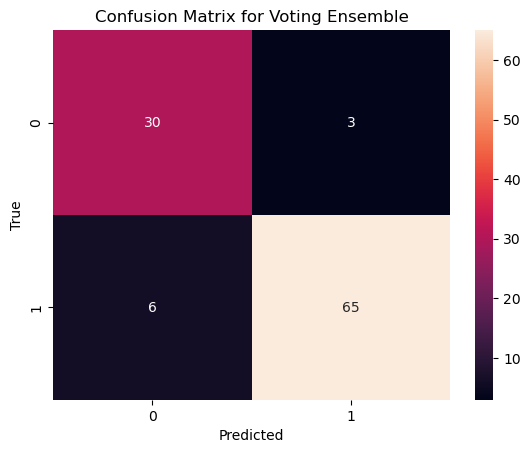

In [58]:
#Voting ensemble

# Fit the model and make predictions
voting.fit(X_train, y_train)
y_pred_voting = voting.predict(X_test)

# Print classification report
print("Classification Report for Voting Ensemble:")
print(classification_report(y_test, y_pred_voting))

# Print confusion matrix
cm_voting = confusion_matrix(y_test, y_pred_voting)
sns.heatmap(cm_voting, annot=True, fmt='d')
plt.title('Confusion Matrix for Voting Ensemble')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Classification Report for Stacking Ensemble:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93        33
           1       0.97      0.96      0.96        71

    accuracy                           0.95       104
   macro avg       0.94      0.95      0.94       104
weighted avg       0.95      0.95      0.95       104



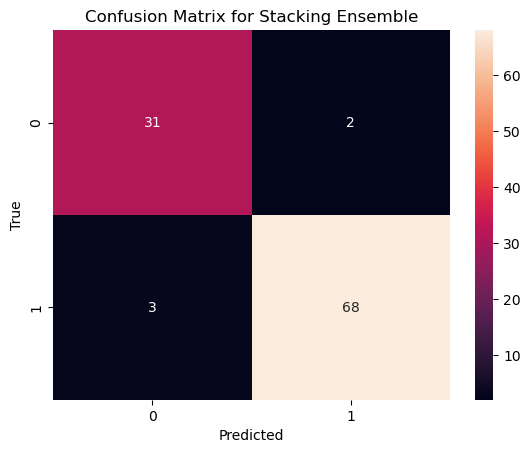

In [59]:
#Stacking ensemble

# Fit the model and make predictions
stacking.fit(X_train, y_train)
y_pred_stacking = stacking.predict(X_test)

# Print classification report
print("Classification Report for Stacking Ensemble:")
print(classification_report(y_test, y_pred_stacking))

# Print confusion matrix
cm_stacking = confusion_matrix(y_test, y_pred_stacking)
sns.heatmap(cm_stacking, annot=True, fmt='d')
plt.title('Confusion Matrix for Stacking Ensemble')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


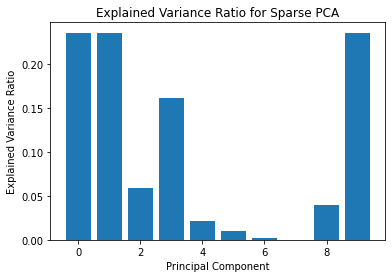

Sparse PCA Statistics:
Explained Variance Ratio:
Principal Component 1: 0.2355
Principal Component 2: 0.2355
Principal Component 3: 0.0590
Principal Component 4: 0.1610
Principal Component 5: 0.0218
Principal Component 6: 0.0098
Principal Component 7: 0.0018
Principal Component 8: 0.0000
Principal Component 9: 0.0401
Principal Component 10: 0.2355

Key Features:
Principal Component 1: Feature 4
Principal Component 2: Feature 4
Principal Component 3: Feature 2
Principal Component 4: Feature 1
Principal Component 5: Feature 7
Principal Component 6: Feature 5
Principal Component 7: Feature 0
Principal Component 8: Feature 6
Principal Component 9: Feature 3
Principal Component 10: Feature 4


In [2]:
#Analyze the dataset after running sparse PCA.  What do we know about the attributes?

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import SparsePCA
from sklearn.model_selection import train_test_split

# Get the current directory
current_dir = os.getcwd()

# Find the .csv file in the current directory
csv_files = [file for file in os.listdir(current_dir) if file.endswith(".csv")]

# Check if the .csv file exists
if "diabetes.csv" in csv_files:
    dataset_file = os.path.join(current_dir, "diabetes.csv")
else:
    raise FileNotFoundError("diabetes.csv file not found in the current directory.")

# Define a data loader function
def load_dataset(file_path):
    # Load the dataset from the CSV file
    df = pd.read_csv(file_path)

    # Perform one-hot encoding for categorical variables
    df_encoded = pd.get_dummies(df, drop_first=True)

    # Extract the feature matrix X
    X = df_encoded.iloc[:, :-1].values

    # Extract the target variable y
    y = df_encoded.iloc[:, -1].values

    return X, y

# Load the dataset using the data loader
X, y = load_dataset(dataset_file)

# Initialize SparsePCA
sparse_pca = SparsePCA(n_components=10, random_state=42)

# Fit and transform the data
X_sparse = sparse_pca.fit_transform(X)

# Calculate the explained variance ratio manually
explained_variance = np.var(X_sparse, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)

# Plot explained variance ratio
plt.bar(range(len(explained_variance_ratio)), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Sparse PCA')
plt.show()

# Identify key features
key_features = np.abs(sparse_pca.components_).argmax(axis=1)

# Print statistics, plots, and key features
print("Sparse PCA Statistics:")
print("Explained Variance Ratio:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Principal Component {i+1}: {ratio:.4f}")

print("\nKey Features:")
for i, feature_idx in enumerate(key_features):
    print(f"Principal Component {i+1}: Feature {feature_idx}")


In [3]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_sparse, y, test_size=0.2, random_state=42)

# Define hyperparameters for Logistic Regression
log_reg_params = {
    'penalty': 'l2',  # Regularization penalty ('l1', 'l2', 'elasticnet', 'none')
    'C': 1.0,  # Inverse of regularization strength
    'solver': 'lbfgs',  # Algorithm to use for optimization ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga')
    'max_iter': 100,  # Maximum number of iterations
    'random_state': 42  # Random seed for reproducibility
}

# Initialize Logistic Regression with hyperparameters
log_reg = LogisticRegression(**log_reg_params)

# Fit the model
log_reg.fit(X_train, y_train)

# Predict the test set results
y_pred = log_reg.predict(X_test)


              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



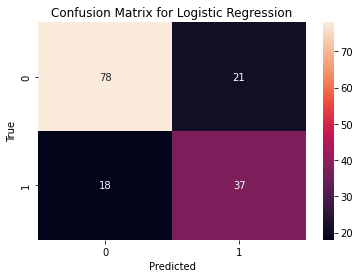

In [4]:
#Stats and plots for LogReg

from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Fit the model and make predictions
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


######
2. Run Random Forest
#####

In [6]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
random_forest.fit(X_train, y_train)

# Predict the test set results
y_pred = random_forest.predict(X_test)

              precision    recall  f1-score   support

           0       0.81      0.75      0.78        99
           1       0.60      0.69      0.64        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.74      0.73      0.73       154



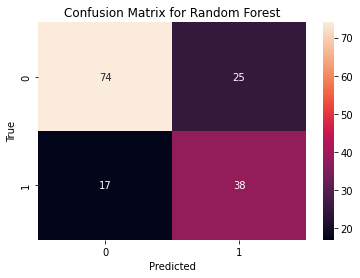

In [7]:
# Fit the model and make predictions
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Deep and Wide NN

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Hyperparameters
hyper_params = {
    'batch_size': 16,
    'learning_rate': 0.01,
    'epochs': 100,
    'input_size': X_sparse.shape[1],
    'hidden_size': 1000,
    'output_size': 1,
    'dropout_rate': 0.85,
}

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_sparse, y, test_size=0.2, random_state=42)

# Convert to tensors
X_tensor = torch.tensor(X_train.astype(np.float32))
y_tensor = torch.tensor(y_train.astype(np.float32)).unsqueeze(1)

# Create a Dataset
dataset = TensorDataset(X_tensor, y_tensor)

# Create a DataLoader
data_loader = DataLoader(dataset, batch_size=hyper_params['batch_size'], shuffle=True)

# Use CUDA if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define the Deep and Wide neural network
class DeepWideNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_rate):
        super(DeepWideNN, self).__init__()
        self.deep = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(hidden_size, output_size),
        )

    def forward(self, x):
        out = self.deep(x)
        return out

# Initialize the model, loss function, and optimizer
nn_model = DeepWideNN(
    input_size=hyper_params['input_size'],
    hidden_size=hyper_params['hidden_size'],
    output_size=hyper_params['output_size'],
    dropout_rate=hyper_params['dropout_rate']
).to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(nn_model.parameters(), lr=hyper_params['learning_rate'])

# Training loop
for epoch in range(hyper_params['epochs']):
    for i, (inputs, labels) in enumerate(data_loader):
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = nn_model(inputs)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}/{hyper_params["epochs"]}, Loss: {loss.item()}')

# Display the final loss
print(f"Final Loss: {loss.item()}")

# Save the model
torch.save(nn_model.state_dict(), "nn_model.pth")

Epoch 1/100, Loss: 22.133522033691406
Epoch 2/100, Loss: 166.5612030029297
Epoch 3/100, Loss: 118.24563598632812
Epoch 4/100, Loss: 315.4409484863281
Epoch 5/100, Loss: 38.6742057800293
Epoch 6/100, Loss: 85.86141967773438
Epoch 7/100, Loss: 64.96189880371094
Epoch 8/100, Loss: 39.77164840698242
Epoch 9/100, Loss: 3.1283185482025146
Epoch 10/100, Loss: 132.73191833496094
Epoch 11/100, Loss: 23.9576358795166
Epoch 12/100, Loss: 74.85028839111328
Epoch 13/100, Loss: 79.07289123535156
Epoch 14/100, Loss: 328.3663024902344
Epoch 15/100, Loss: 50.408443450927734
Epoch 16/100, Loss: 89.1848373413086
Epoch 17/100, Loss: 8.4650297164917
Epoch 18/100, Loss: 65.3206558227539
Epoch 19/100, Loss: 244.5897674560547
Epoch 20/100, Loss: 0.0
Epoch 21/100, Loss: 0.0
Epoch 22/100, Loss: 93.3685302734375
Epoch 23/100, Loss: 26.125511169433594
Epoch 24/100, Loss: 0.0
Epoch 25/100, Loss: 129.90480041503906
Epoch 26/100, Loss: 18.471385955810547
Epoch 27/100, Loss: 146.07427978515625
Epoch 28/100, Loss: 82.

## Tuning our Deep and Wide model

In [10]:
import json
from tqdm import tqdm
# Define a list or range of values for each hyperparameter
batch_sizes = [16,32,64,128, 256, 512]
learning_rates = [0.0001,0.001, 0.01, 0.1]
hidden_sizes = [50, 100, 500, 1000, 1500]
dropout_rates = [0.15, 0.3, 0.5, 0.7, 0.85]

# Placeholder variables for storing the best parameters and the best accuracy
best_params = None
best_accuracy = 0.0

# Use CUDA if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Loop over the hyperparameters
for batch_size in tqdm(batch_sizes):
    for learning_rate in learning_rates:
        for hidden_size in hidden_sizes:
            for dropout_rate in dropout_rates:

                # Create a DataLoader with the current batch_size
                data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

                # Initialize the model, loss function, and optimizer with the current hyperparameters
                nn_model = DeepWideNN(
                    input_size=hyper_params['input_size'],
                    hidden_size=hidden_size,
                    output_size=hyper_params['output_size'],
                    dropout_rate=dropout_rate
                ).to(device)
                criterion = nn.BCEWithLogitsLoss()
                optimizer = optim.SGD(nn_model.parameters(), lr=learning_rate)

                # Training loop
                for epoch in range(hyper_params['epochs']):
                    for i, (inputs, labels) in enumerate(data_loader):
                        inputs, labels = inputs.to(device), labels.to(device)

                        # Forward pass
                        outputs = nn_model(inputs)
                        loss = criterion(outputs, labels)

                        # Backward and optimize
                        optimizer.zero_grad()
                        loss.backward()
                        optimizer.step()

                # Evaluate the model on the test set to get the accuracy
                nn_model.eval()
                with torch.no_grad():
                    X_test_tensor = torch.tensor(X_test.astype(np.float32)).to(device)
                    y_test_tensor = torch.tensor(y_test.astype(np.float32)).unsqueeze(1).to(device)
                    outputs = nn_model(X_test_tensor)
                    predictions = torch.sigmoid(outputs) > 0.5
                    accuracy = (predictions == y_test_tensor).float().mean()

                # If the accuracy is better than the best_accuracy found so far, update the best_params and best_accuracy
                if accuracy > best_accuracy:
                    print(accuracy)
                    best_params = {'batch_size': batch_size, 'learning_rate': learning_rate, 
                                   'hidden_size': hidden_size, 'dropout_rate': dropout_rate}
                    best_accuracy = accuracy

# Print the best hyperparameters and the corresponding accuracy
print(f"Best Params: {best_params}, Best Accuracy: {best_accuracy}")

# Save the best parameters
with open("best_params.json", "w") as f:
    json.dump(best_params, f)


  0%|          | 0/6 [00:00<?, ?it/s]

tensor(0.7468)
tensor(0.7597)
tensor(0.7857)


100%|██████████| 6/6 [11:48<00:00, 118.05s/it]

Best Params: {'batch_size': 16, 'learning_rate': 0.001, 'hidden_size': 100, 'dropout_rate': 0.7}, Best Accuracy: 0.7857142686843872


In [11]:
from sklearn.base import BaseEstimator, ClassifierMixin

class PyTorchClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, model, criterion, optimizer, epochs):
        self.model = model
        self.criterion = criterion
        self.optimizer = optimizer
        self.epochs = epochs

    def fit(self, X, y):

        dataset = TensorDataset(X, y)
        data_loader = DataLoader(dataset, batch_size=hyper_params['batch_size'], shuffle=True)

        for epoch in range(self.epochs):
            for i, (inputs, labels) in enumerate(data_loader):
                inputs, labels = inputs.to(device), labels.to(device)

                # Forward pass
                outputs = self.model(inputs)
                loss = self.criterion(outputs, labels)

                # Backward and optimize
                self.optimizer.zero_grad()
                loss.backward()
                self.optimizer.step()

        return self

    def predict_proba(self, X):
        with torch.no_grad():
            outputs = self.model(X)
            probs = torch.sigmoid(outputs)
            return probs.cpu().numpy()

    def predict(self, X):
        probas = self.predict_proba(X)
        return (probas > 0.5).astype(int)

# Wrap the PyTorch model
nn_model_sklearn = PyTorchClassifier(nn_model, criterion, optimizer, epochs=hyper_params['epochs'])

# Now, you can use nn_model_sklearn in your sklearn ensemble models


              precision    recall  f1-score   support

           0       0.64      1.00      0.78        99
           1       0.00      0.00      0.00        55

    accuracy                           0.64       154
   macro avg       0.32      0.50      0.39       154
weighted avg       0.41      0.64      0.50       154



/Users/jack_qin/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jack_qin/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jack_qin/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


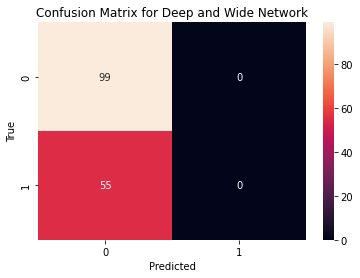

In [12]:
# Fit the model
X_train_tensor = torch.tensor(X_train.astype(np.float32))
y_train_tensor = torch.tensor(y_train.astype(np.float32)).unsqueeze(1)
X_test_tensor = torch.tensor(X_test.astype(np.float32))

nn_model_sklearn.fit(X_train_tensor, y_train_tensor)
y_pred = nn_model_sklearn.predict(X_test_tensor)

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix for Deep and Wide Network')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#####
After running all 3 models, perform ensemble methods of VOTING and STACKING.  Compare results
#####

In [13]:
class PyTorchClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, model, epochs=5):
        self.model = model
        self.epochs = epochs

    def fit(self, X, y):
        X_tensor = torch.tensor(X.astype(np.float32))
        y_tensor = torch.tensor(y.astype(np.float32)).unsqueeze(1)
        self.model.fit(X_tensor, y_tensor)
        return self

    def predict(self, X):
        X_tensor = torch.tensor(X.astype(np.float32))
        y_pred = self.model.predict(X_tensor)
        return y_pred.cpu().numpy()

    def predict_proba(self, X):
        y_pred = self.predict(X)
        return np.column_stack((1 - y_pred, y_pred))

nn_model_sklearn_wrapped = PyTorchClassifierWrapper(nn_model_sklearn)

In [14]:
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score
class PyTorchClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, model, epochs=5):
        self.model = model
        self.epochs = epochs
        self.classes_ = None  # Initialize classes_ attribute

    def fit(self, X, y):
        X_tensor = torch.tensor(X.astype(np.float32))
        y_tensor = torch.tensor(y.astype(np.float32)).unsqueeze(1)
        self.classes_ = np.unique(y)  # update classes_ attribute on fit
        self.model.fit(X_tensor, y_tensor)
        return self

    def predict(self, X):
        X_tensor = torch.tensor(X.astype(np.float32))
        y_pred = self.model.predict(X_tensor)
        return y_pred 

    def predict_proba(self, X):
        y_pred = self.predict(X)
        return np.column_stack((1 - y_pred, y_pred))


nn_model_sklearn_wrapped = PyTorchClassifierWrapper(nn_model_sklearn)

# Initialize the ensemble models
voting = VotingClassifier(estimators=[('lr', log_reg), ('rf', random_forest), ('nn', nn_model_sklearn_wrapped)], voting='soft')
stacking = StackingClassifier(estimators=[('lr', log_reg), ('rf', random_forest), ('nn', nn_model_sklearn_wrapped)], final_estimator=LogisticRegression())

# Fit the voting ensemble model
voting.fit(X_train, y_train)

# Predict the test set results
y_pred_voting = voting.predict(X_test)

# Fit the stacking ensemble model
stacking.fit(X_train, y_train)

# Predict the test set results
y_pred_stacking = stacking.predict(X_test)

# Calculate the accuracy of the voting ensemble
accuracy_voting = accuracy_score(y_test, y_pred_voting)

# Calculate the accuracy of the stacking ensemble
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)

# Print the accuracies
print(f'Accuracy of voting ensemble: {accuracy_voting}')
print(f'Accuracy of stacking ensemble: {accuracy_stacking}')

# Choose the better model
if accuracy_voting > accuracy_stacking:
    best_model = voting
else:
    best_model = stacking


Accuracy of voting ensemble: 0.7662337662337663
Accuracy of stacking ensemble: 0.7402597402597403


Classification Report for Voting Ensemble:
              precision    recall  f1-score   support

           0       0.74      0.97      0.84        99
           1       0.88      0.40      0.55        55

    accuracy                           0.77       154
   macro avg       0.81      0.68      0.70       154
weighted avg       0.79      0.77      0.74       154



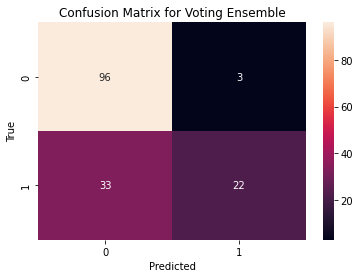

In [15]:
#Voting ensemble

# Fit the model and make predictions
voting.fit(X_train, y_train)
y_pred_voting = voting.predict(X_test)

# Print classification report
print("Classification Report for Voting Ensemble:")
print(classification_report(y_test, y_pred_voting))

# Print confusion matrix
cm_voting = confusion_matrix(y_test, y_pred_voting)
sns.heatmap(cm_voting, annot=True, fmt='d')
plt.title('Confusion Matrix for Voting Ensemble')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Classification Report for Stacking Ensemble:
              precision    recall  f1-score   support

           0       0.81      0.78      0.79        99
           1       0.63      0.67      0.65        55

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154



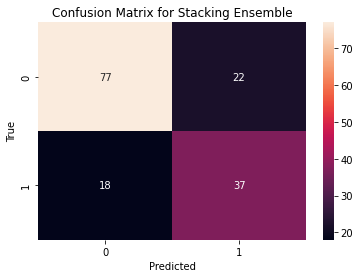

In [16]:
#Stacking ensemble

# Fit the model and make predictions
stacking.fit(X_train, y_train)
y_pred_stacking = stacking.predict(X_test)

# Print classification report
print("Classification Report for Stacking Ensemble:")
print(classification_report(y_test, y_pred_stacking))

# Print confusion matrix
cm_stacking = confusion_matrix(y_test, y_pred_stacking)
sns.heatmap(cm_stacking, annot=True, fmt='d')
plt.title('Confusion Matrix for Stacking Ensemble')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
